<a href="https://colab.research.google.com/github/Git-Hub-Collaboration/MSC-Collaboration-V1/blob/main/Datascience_Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
1. Preprocessing:
2. Visualization:
3. Modeling:

# Data Preprocessing
- Dedan
- Richard
- Felix

# Data Visualizations:
- Eric
- Evelyn
- Denis

# Modelling Section
- Samson
- Peter
- Edna


##a.Data Preprocessing

In [5]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [6]:
import os
os.listdir()

['.config', 'sample_data']

In [7]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
data =  pd.read_csv("/content/drive/MyDrive/df1_loan.csv")

In [10]:
data.head(5)

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,$5849.0
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,$6091.0
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,$3000.0
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,$4941.0
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,$6000.0


In [11]:
# check shape of the data
data.shape

(500, 15)

In [12]:
# checking null values in varies Columns of our Dataset
data.isnull().sum()

Unnamed: 0            0
Loan_ID               0
Gender                9
Married               3
Dependents           12
Education             0
Self_Employed        27
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     14
Credit_History       41
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

In [13]:
# Drop unnecessary columns
data = data.drop(columns=['Unnamed: 0', 'Loan_ID'])

In [14]:
# Remove dollar sign from 'Total_amount' column
data['Total_Income'] = data['Total_Income'].str.replace('$', '')

# Convert 'Total_amount' column to numeric
data['Total_Income'] = pd.to_numeric(data['Total_Income'])

In [15]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

In [16]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
data['LoanAmount'] = imputer.fit_transform(data['LoanAmount'].values.reshape(-1, 1))
data['Loan_Amount_Term'] = imputer.fit_transform(data['Loan_Amount_Term'].values.reshape(-1, 1))
data['Credit_History'] = imputer.fit_transform(data['Credit_History'].values.reshape(-1, 1))
data['Self_Employed'] = imputer.fit_transform(data['Self_Employed'].values.reshape(-1, 1))
data['Married'] = imputer.fit_transform(data['Married'].values.reshape(-1, 1))
data['Dependents'] = imputer.fit_transform(data['Dependents'].values.reshape(-1, 1))
data['Gender'] = imputer.fit_transform(data['Gender'].values.reshape(-1, 1))








In [17]:
# view the new data
data.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1.0,0.0,0.0,0,0.0,5849,0.0,144.020747,360.0,1.0,2,1,5849.0
1,1.0,1.0,1.0,0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0
2,1.0,1.0,0.0,0,1.0,3000,0.0,66.000000,360.0,1.0,2,1,3000.0
3,1.0,1.0,0.0,1,0.0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0
4,1.0,0.0,0.0,0,0.0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0


In [18]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = data.drop(columns=['Loan_Status'])
y = data['Loan_Status']

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##2.Visualizations

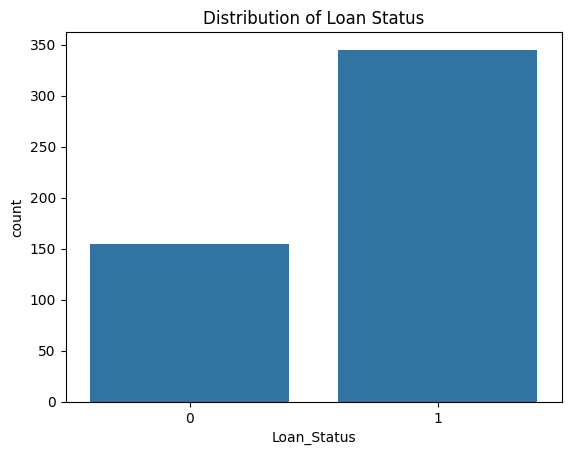

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the distribution of the target variable
sns.countplot(x='Loan_Status', data=data)
plt.title('Distribution of Loan Status')
plt.show()

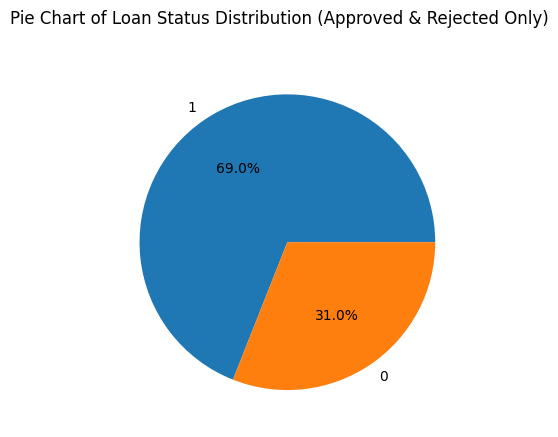

In [21]:
approved_rejected = data[data['Loan_Status'].isin(['Y', 'N'])]
loan_counts = data['Loan_Status'].value_counts().reset_index()
loan_counts.columns = ['Loan Status', 'Number of Applicants']
plt.pie(loan_counts['Number of Applicants'], labels=loan_counts['Loan Status'], autopct='%1.1f%%')
plt.suptitle('Pie Chart of Loan Status Distribution (Approved & Rejected Only)')
plt.show()

Income

In [22]:
income_ranges = ['<=$5000', '$5001 - $7000', '$7001-$9000', '>$9001']
cut_points = [0, 5000, 7000, 9000, float('inf')]

grouped_income = pd.cut(data['Total_Income'], bins=cut_points, labels=income_ranges) \
                 .value_counts().reset_index()
grouped_income.columns = ['Income', 'Number of Applicants']
print(grouped_income)

          Income  Number of Applicants
0        <=$5000                   224
1  $5001 - $7000                   135
2         >$9001                    89
3    $7001-$9000                    52


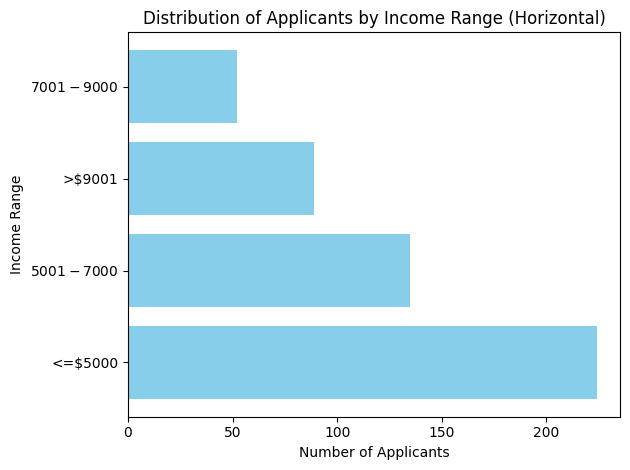

In [23]:
plt.barh(grouped_income['Income'], grouped_income['Number of Applicants'], color='skyblue')
plt.xlabel('Number of Applicants')
plt.ylabel('Income Range')
plt.title('Distribution of Applicants by Income Range (Horizontal)')
plt.tight_layout()
plt.show()

loan_amount

In [24]:
loan_ranges = ['<=120', '121 - 160)', '161-200)', '>200)']
cut_points = [0, 120, 160, 200, float('inf')]

grouped_loan = pd.cut(data['LoanAmount'], bins=cut_points, labels=loan_ranges) \
                 .value_counts().reset_index()
grouped_loan.columns = ['Loan', 'Number of Applicants']
print(grouped_loan)

         Loan  Number of Applicants
0       <=120                   220
1  121 - 160)                   159
2    161-200)                    62
3       >200)                    59


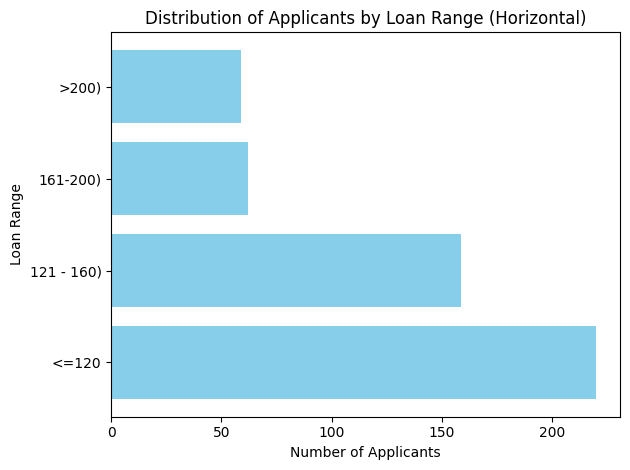

In [25]:
plt.barh(grouped_loan['Loan'], grouped_loan['Number of Applicants'], color='skyblue')
plt.xlabel('Number of Applicants')
plt.ylabel('Loan Range')
plt.title('Distribution of Applicants by Loan Range (Horizontal)')
plt.tight_layout()
plt.show()

Dependancy

In [26]:
# number of dependents
def Dependents(value):
    if 0<= value <=1:
        return 'low'
    if 2<= value <= 3:
        return 'Moderate'
    else:
        return 'high'

In [27]:
data['Dependents_level'] = data['Dependents'].apply(Dependents)

<Axes: ylabel='count'>

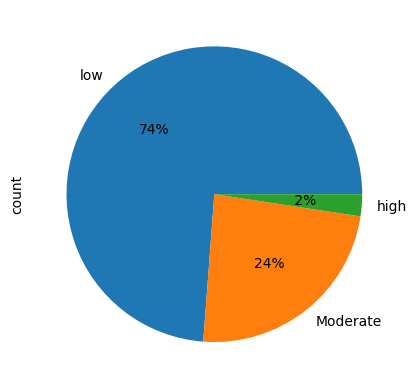

In [28]:
data.Dependents_level.value_counts().plot(kind='pie',autopct="%2.0f%%")

Eric (Visualization cont)

In [29]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'Dependents_level'],
      dtype='object')

In [30]:
data.columns.dtype

dtype('O')

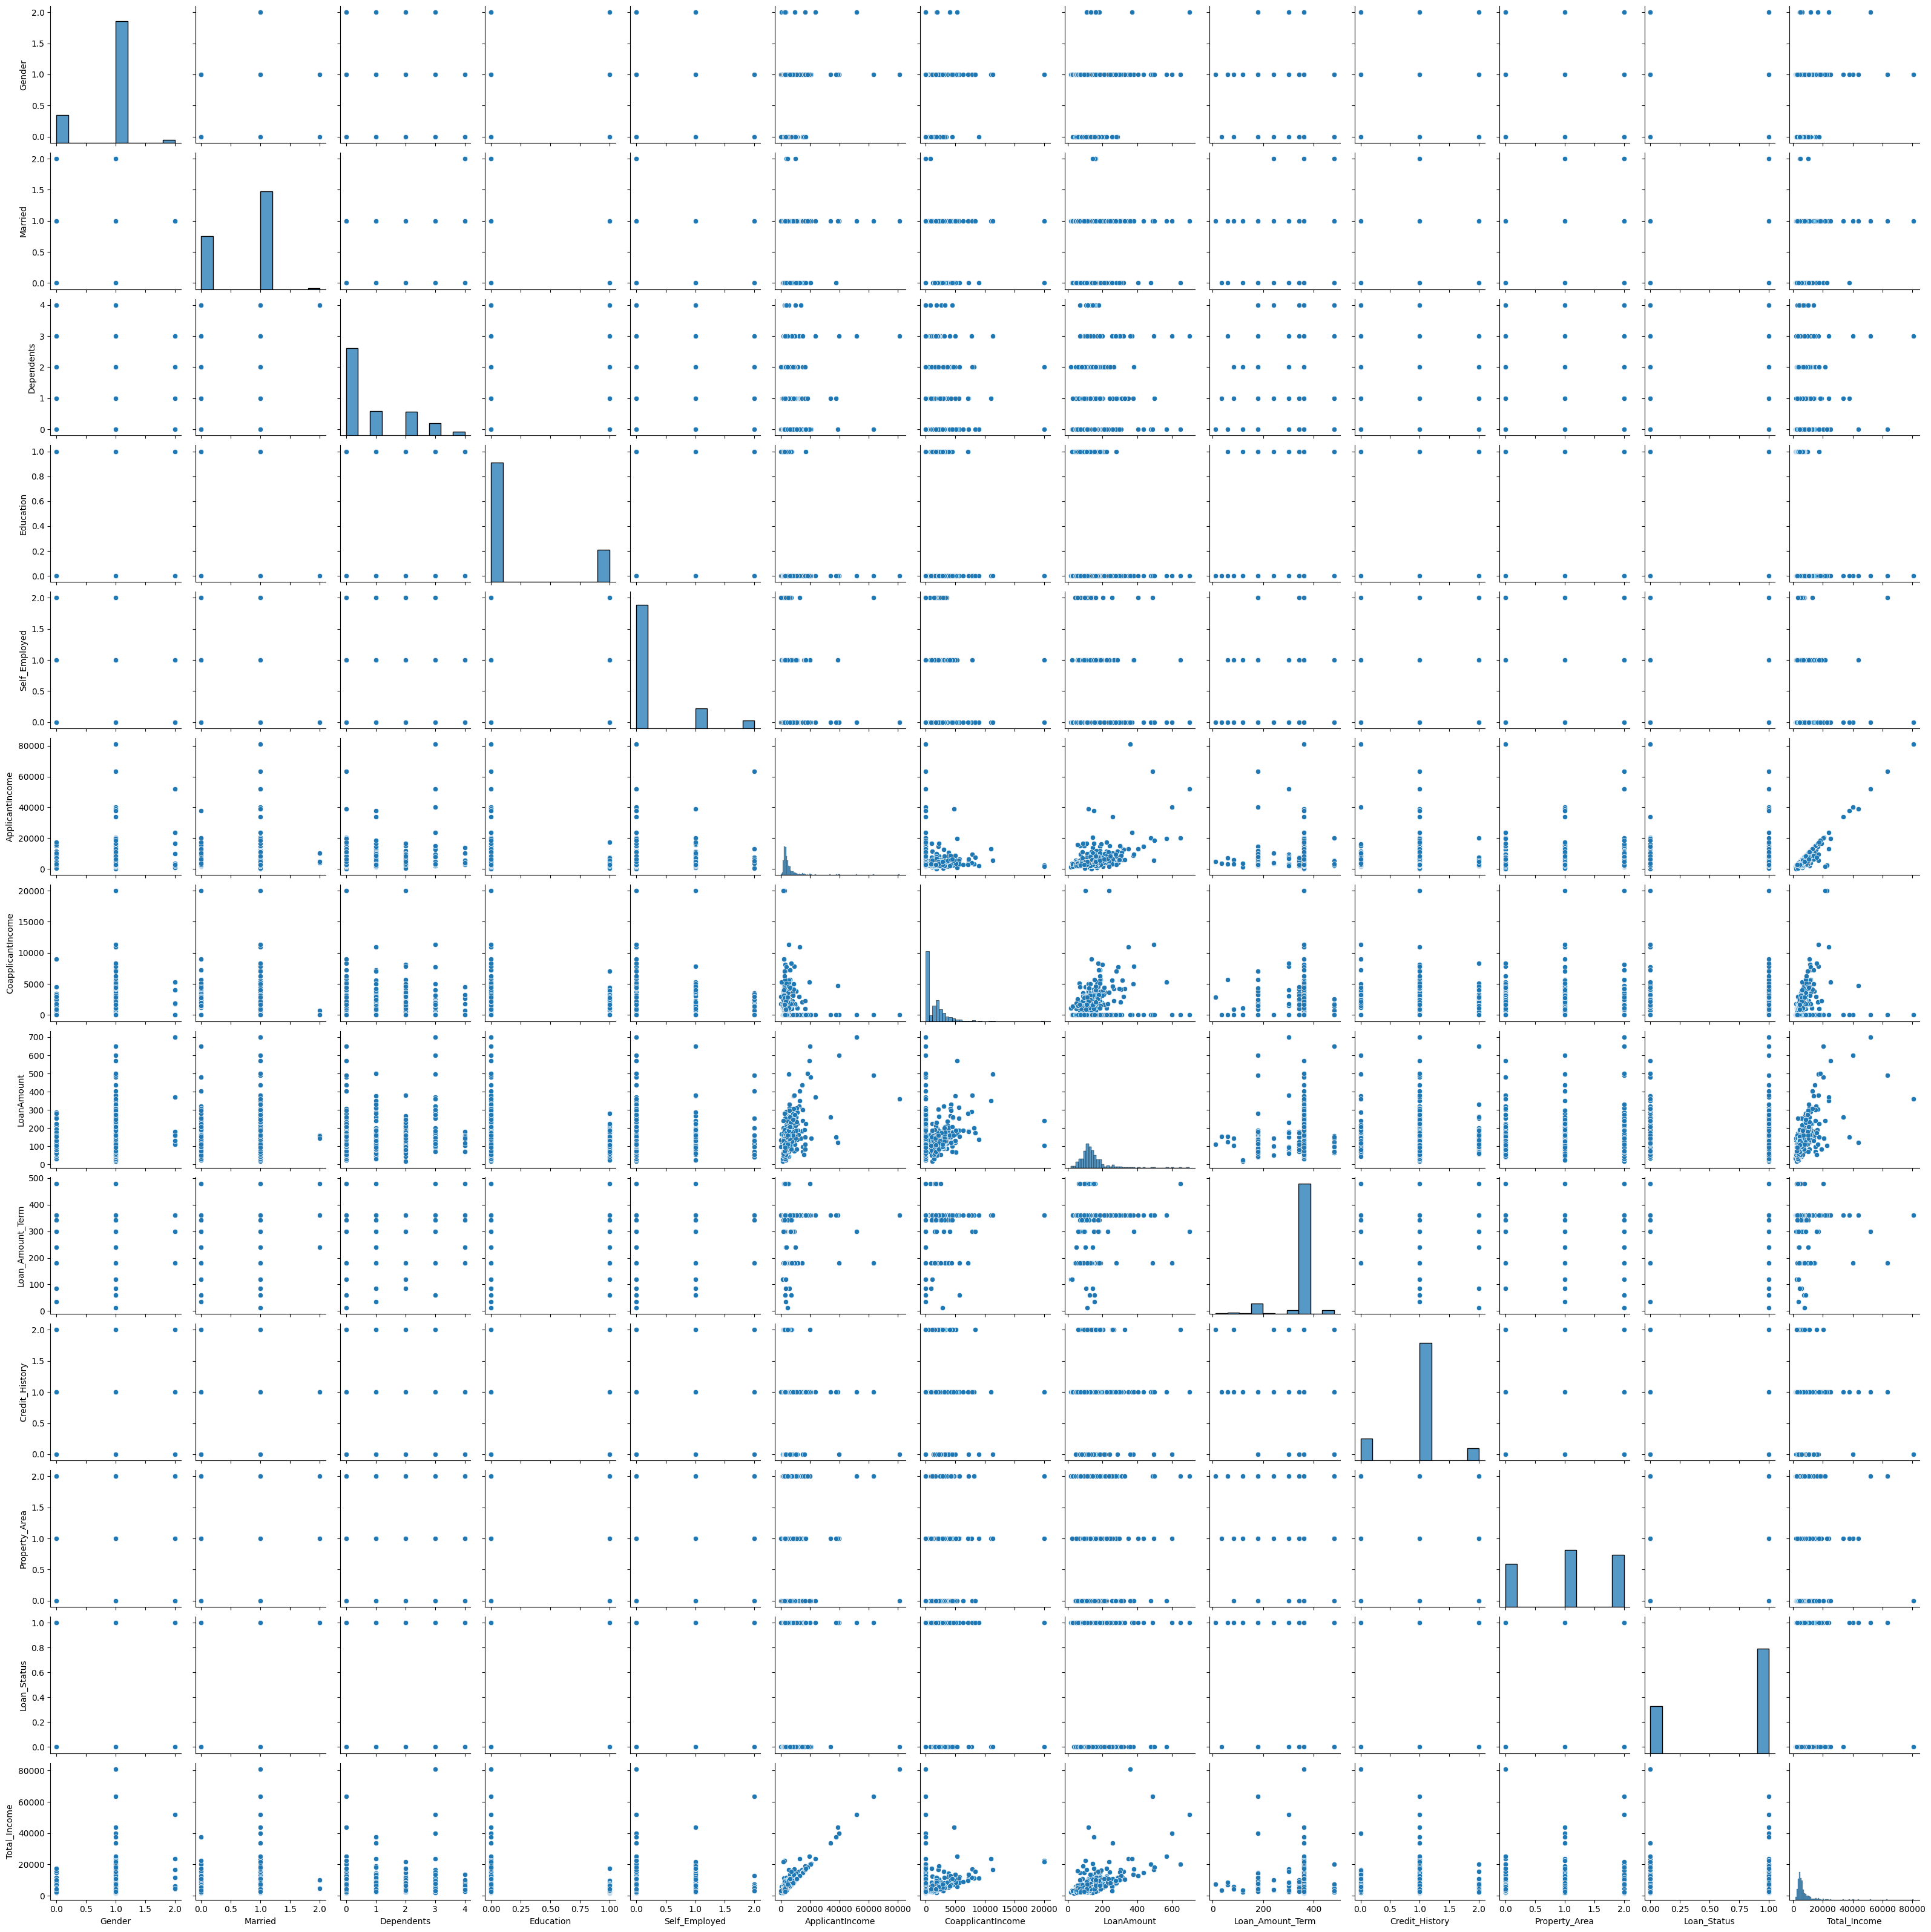

In [31]:
sns.pairplot(data)

In [32]:
plot_dropped = data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Property_Area', 'Loan_Status',
       'Total_Income', 'Dependents_level'], axis=1)

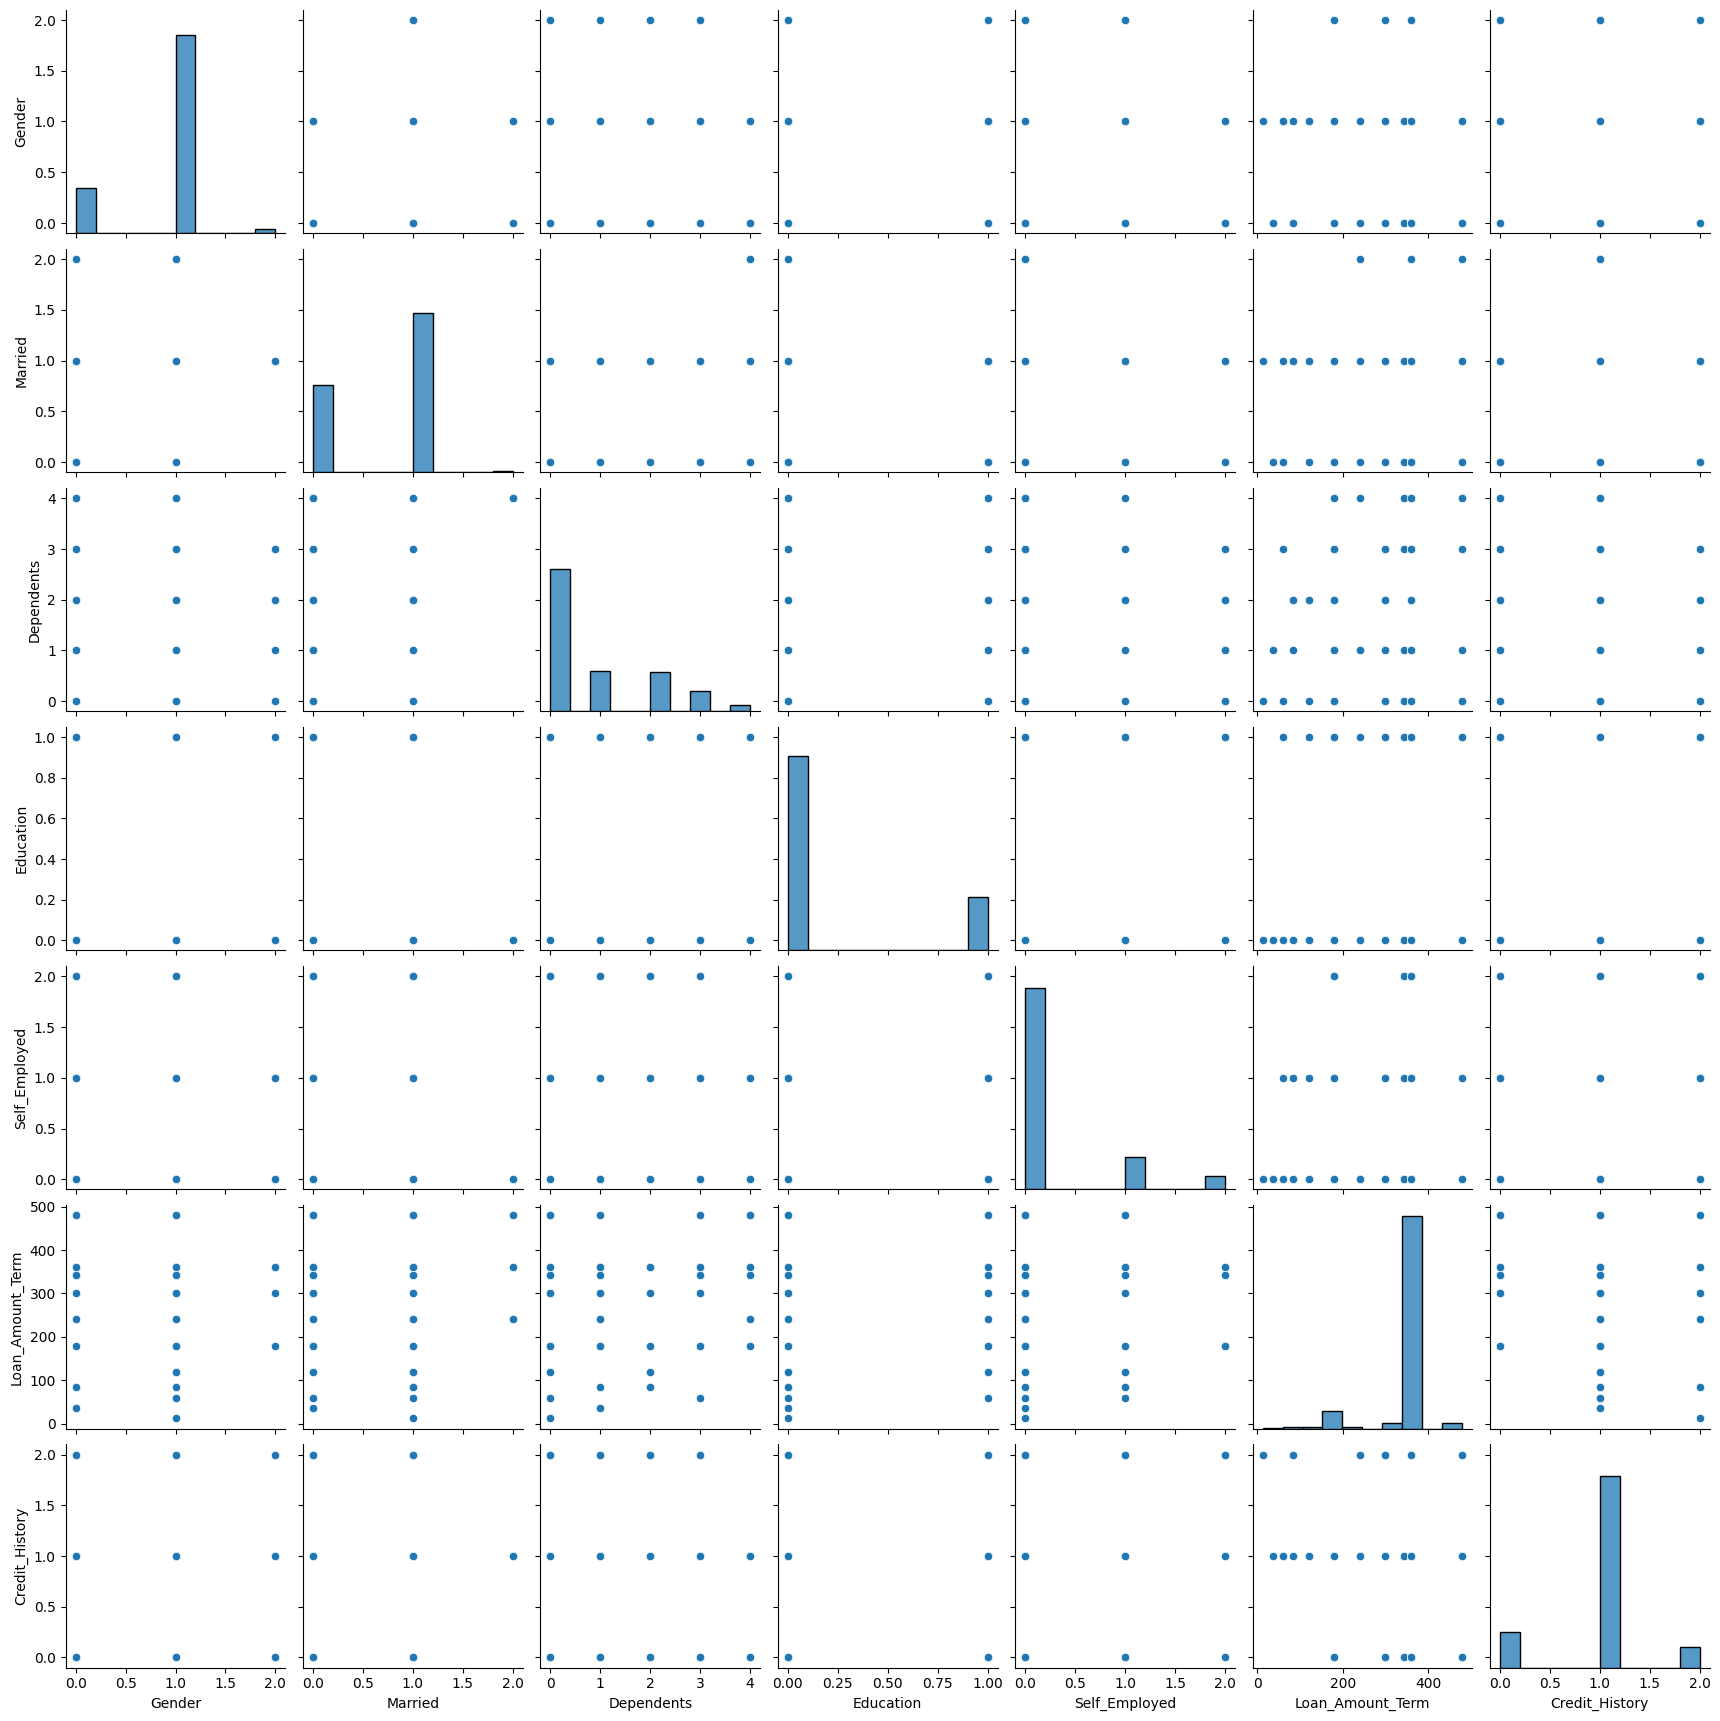

In [33]:
sns.pairplot(plot_dropped)

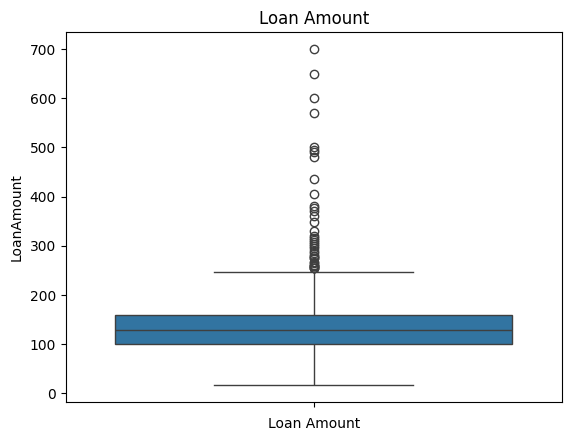

In [34]:
sns.boxplot(data['LoanAmount'])
plt.title("Loan Amount")
plt.xlabel("Loan Amount")
plt.show()

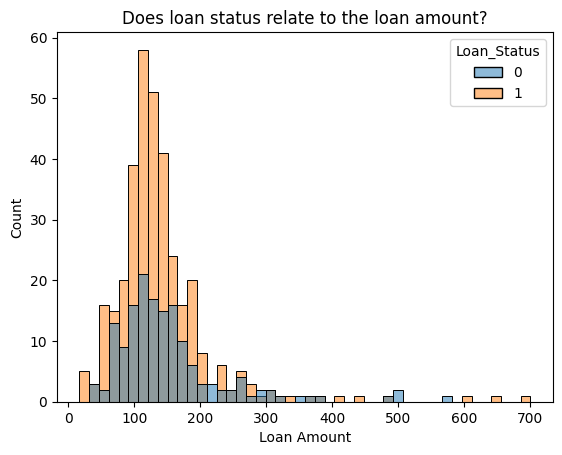

In [35]:
sns.histplot(data, x='LoanAmount', hue='Loan_Status')
plt.title("Does loan status relate to the loan amount?")
plt.xlabel("Loan Amount")
plt.ylabel("Count")
plt.show()

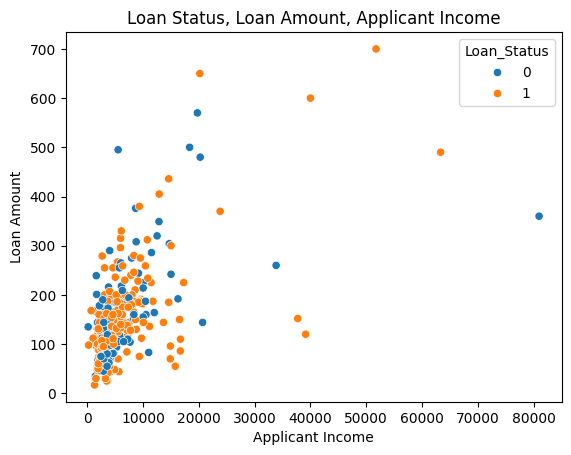

In [36]:
sns.scatterplot(x=data['ApplicantIncome'], y= data['LoanAmount'], hue=data['Loan_Status'])
plt.title("Loan Status, Loan Amount, Applicant Income")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

In [37]:
loan_asset = data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Total_Income']]


In [38]:
loan_asset_corr = loan_asset.corr()

<Axes: >

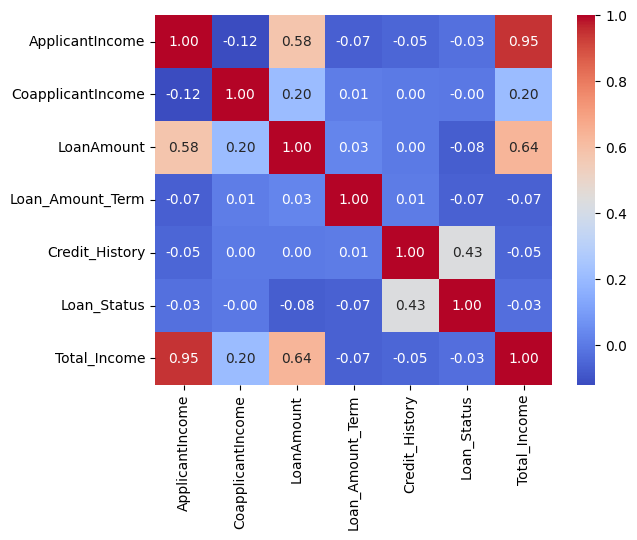

In [39]:
sns.heatmap(loan_asset_corr, annot=True, fmt=".2f", cmap="coolwarm")

In [40]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'Dependents_level'],
      dtype='object')

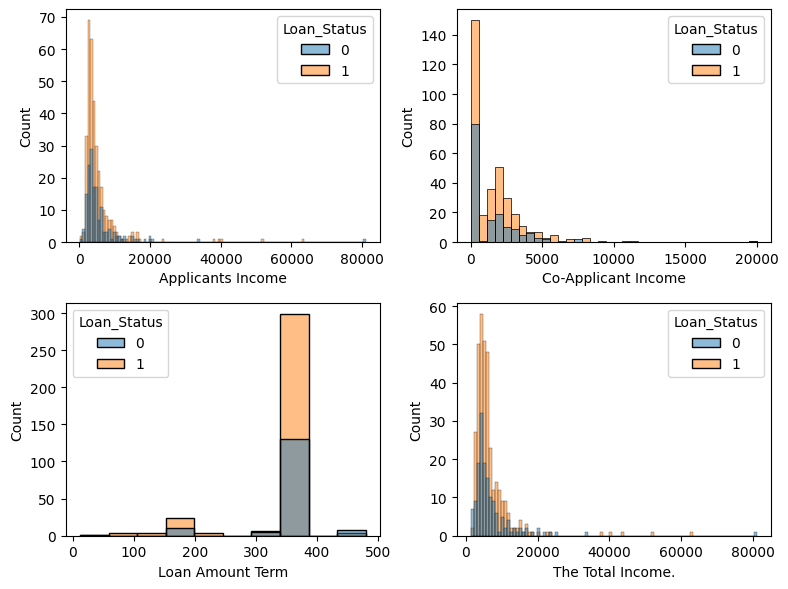

In [41]:
fig,axes = plt.subplots(2, 2, figsize = (8, 6))

sns.histplot(data, x = 'ApplicantIncome', hue = 'Loan_Status', ax = axes[0,0])
axes[0,0].set_xlabel("Applicants Income")
axes[0,0].set_ylabel("Count")

sns.histplot(data, x = 'Loan_Amount_Term', hue = 'Loan_Status', ax = axes[1,0])
axes[1,0].set_xlabel("Loan Amount Term")
axes[1,0].set_ylabel("Count")

sns.histplot(data, x = 'CoapplicantIncome', hue = 'Loan_Status', ax = axes[0,1])
axes[0,1].set_xlabel("Co-Applicant Income")
axes[0,1].set_ylabel("Count")

sns.histplot(data, x = 'Total_Income', hue = 'Loan_Status', ax = axes[1,1])
axes[1,1].set_xlabel("The Total Income.")
axes[1,1].set_ylabel("Count")

plt.tight_layout()
plt.show()

Eric (Visualization - End)

Evelyn (Visualization  start)

DATA RELATIONSHIP ANALYSIS


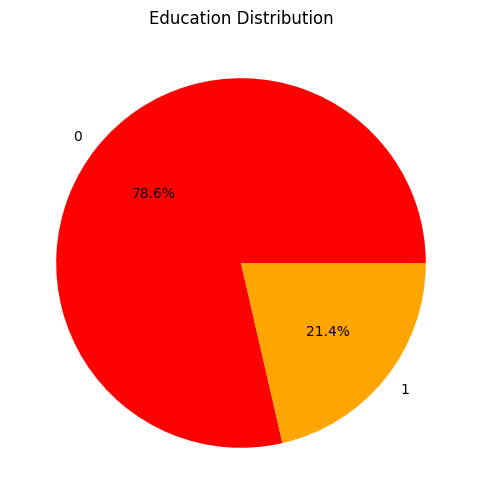

In [42]:
education_counts = data['Education'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=['red', 'orange'])
plt.title('Education Distribution')
plt.show()

Loan_Amount_Term
360.00000    415
180.00000     35
342.54321     14
300.00000     12
480.00000     12
240.00000      3
120.00000      3
60.00000       2
84.00000       2
36.00000       1
12.00000       1
Name: count, dtype: int64


<ipython-input-43-92e70d15f561>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Loan_Amount_Term", data=data, palette="flare")


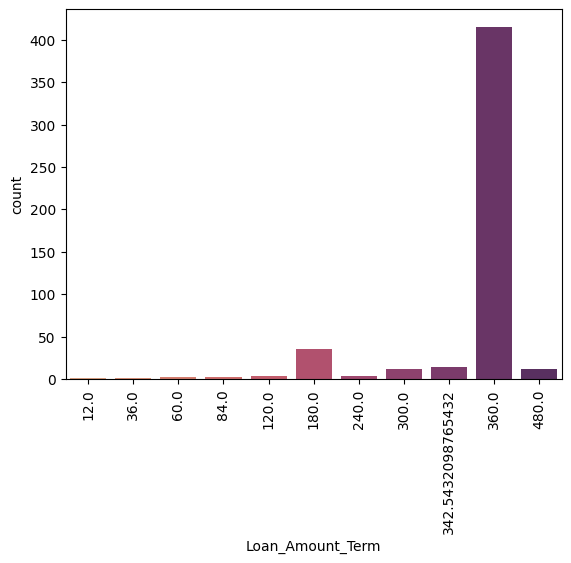

In [43]:
#check the most popular loan duration
Loan_Amount_TermAnalysis = data.Loan_Amount_Term.value_counts(dropna=False)
print(Loan_Amount_TermAnalysis)

# Bar Charts Analysis "For Loan amount term feature"
sns.countplot(x="Loan_Amount_Term", data=data, palette="flare")
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

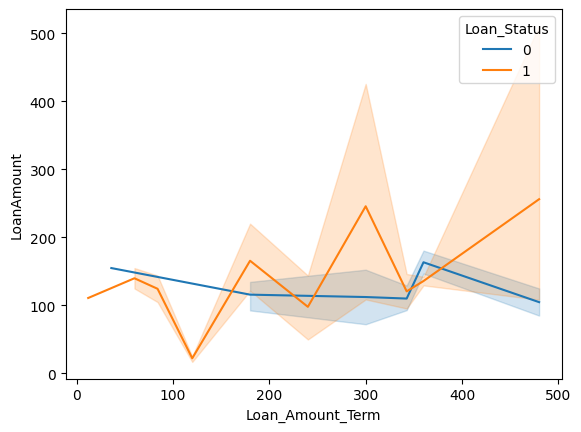

In [44]:
#approving loans that are easier to pay back quickly and bring in more money. If a loan is small or takes a long time to repay, it's more likely to be rejected.
sns.lineplot(x='Loan_Amount_Term', y='LoanAmount', data=data, hue='Loan_Status')

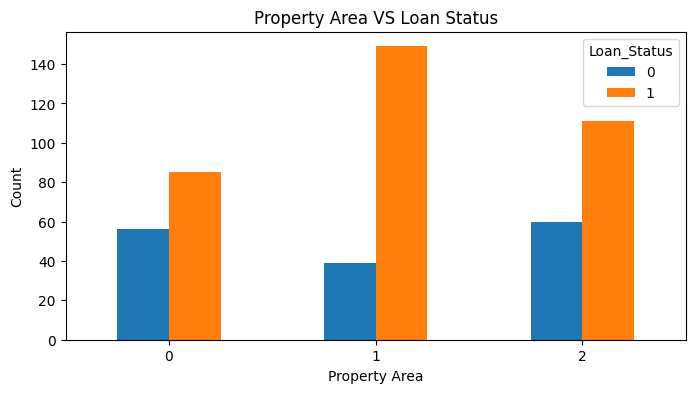

In [45]:
# Create a cross-tabulation of 'Property Area' and 'Loan Status' variables
#0=rural 1=semiurban 2= urban
pd.crosstab(data.Property_Area, data.Loan_Status).plot(kind="bar", figsize=(8, 4))

# Add a title to the plot
plt.title('Property Area VS Loan Status')

# Label the x-axis
plt.xlabel('Property Area')

# Label the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=0)

# Display the plot
plt.show()
#Most of loan that got accepted has property in Semiurban compared to Urban and Rural.

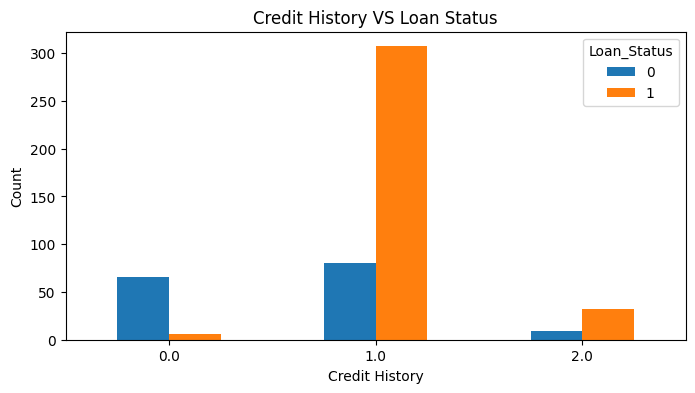

In [46]:
# Create a cross-tabulation of 'Credit History' and 'Loan status' variables
pd.crosstab(data.Credit_History, data.Loan_Status).plot(kind="bar", figsize=(8, 4))

# Add a title to the plot
plt.title('Credit History VS Loan Status')

# Label the x-axis
plt.xlabel('Credit History')

# Label the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=0)

# Display the plot
plt.show()
# a good credit history significantly increases the chances of loan approval.

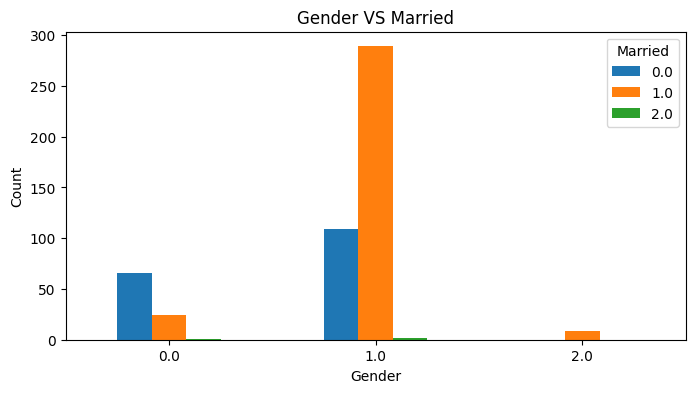

In [47]:
# Create a cross-tabulation of 'Gender' and 'Married' variables
pd.crosstab(data.Gender, data.Married).plot(kind="bar", figsize=(8, 4))

# Add a title to the plot
plt.title('Gender VS Married')

# Label the x-axis
plt.xlabel('Gender')

# Label the y-axis
plt.ylabel('Count')

# Rotate the x-axis labels to avoid overlap
plt.xticks(rotation=0)

# Display the plot
plt.show()
#male applicants are already married compared to female applicants
#the number of not married male applicants are higher compare to female applicants that had not married.

<Axes: title={'center': 'Gender VS loan status'}, xlabel='Gender', ylabel='count'>

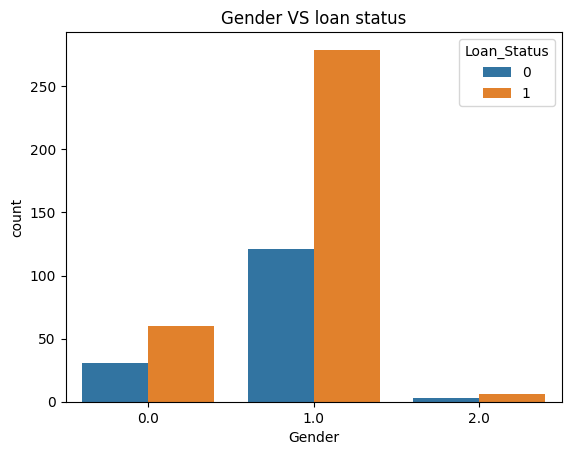

In [48]:
#female clients get more   loan rejections,
plt.title('Gender VS loan status')
sns.countplot(x = 'Gender', data = data, hue = 'Loan_Status')

Text(0.5, 1.0, 'Self Employed')

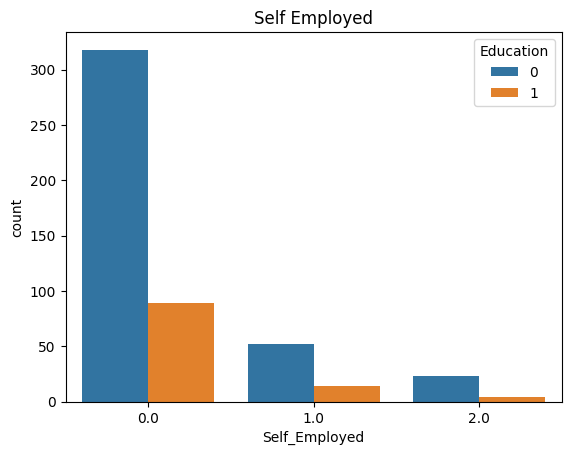

In [49]:
#people who are not self employed have higher counts for Graduates on the other hand who are self employed have higher counts for Not Graduates
sns.countplot(x='Self_Employed', data = data, hue = 'Education').set_title('Self Employed')

##c.Modelling Using Various Classification Algorithms

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [51]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


Logistic Regression Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.79      0.35      0.49        31
           1       0.77      0.96      0.85        69

    accuracy                           0.77       100
   macro avg       0.78      0.66      0.67       100
weighted avg       0.77      0.77      0.74       100



In [52]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))


Decision Tree Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.58      0.58      0.58        31
           1       0.81      0.81      0.81        69

    accuracy                           0.74       100
   macro avg       0.70      0.70      0.70       100
weighted avg       0.74      0.74      0.74       100



In [53]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.86      0.61      0.72        31
           1       0.85      0.96      0.90        69

    accuracy                           0.85       100
   macro avg       0.85      0.78      0.81       100
weighted avg       0.85      0.85      0.84       100



In [54]:
import pickle

# Assuming `model` is your machine learning model
with open('rf_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [55]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))


Naive Bayes Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.74      0.55      0.63        31
           1       0.82      0.91      0.86        69

    accuracy                           0.80       100
   macro avg       0.78      0.73      0.75       100
weighted avg       0.79      0.80      0.79       100



In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
# Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

SVM Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.69      1.00      0.82        69

    accuracy                           0.69       100
   macro avg       0.34      0.50      0.41       100
weighted avg       0.48      0.69      0.56       100



In [58]:
# Neural Network
nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)
nn_pred = nn_model.predict(X_test)
print("Neural Network Accuracy:", accuracy_score(y_test, nn_pred))
print(classification_report(y_test, nn_pred))

Neural Network Accuracy: 0.69
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        31
           1       0.69      1.00      0.82        69

    accuracy                           0.69       100
   macro avg       0.34      0.50      0.41       100
weighted avg       0.48      0.69      0.56       100



In [59]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
# Neural Network using TensorFlow and Keras
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])





In [60]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

nn_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
print("Neural Network Accuracy:", accuracy_score(y_test, nn_pred))
print(classification_report(y_test, nn_pred))

4/4 [==============================] - 0s 2ms/step
Neural Network Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.78      0.68      0.72        31
           1       0.86      0.91      0.89        69

    accuracy                           0.84       100
   macro avg       0.82      0.80      0.81       100
weighted avg       0.84      0.84      0.84       100



In [65]:
model.save('nn_model.h5')

In [61]:
import pickle

# Assuming `model` is your machine learning model
with open('nn_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [62]:
!pip install XGBoost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.5 MB/s eta 0:00:00


In [63]:
from xgboost import XGBClassifier

# XGBoost
xgb_model =XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print(classification_report(y_test, xgb_pred))

XGBoost Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.63      0.55      0.59        31
           1       0.81      0.86      0.83        69

    accuracy                           0.76       100
   macro avg       0.72      0.70      0.71       100
weighted avg       0.75      0.76      0.76       100

